In [7]:
from gurobipy import Model, GRB, quicksum
import random

# Set random seed for reproducibility
random.seed(42)

# Define the range for products (i), transportation modes (j), suppliers (k), and time periods (l)
I, J, K, L = 5, 3, 4, 6

# Create a model
m = Model("SupplyChainOptimization")

# Decision variables
x = m.addVars(I, J, K, L, vtype=GRB.BINARY, name="x")
y = m.addVars(I, K, L, vtype=GRB.BINARY, name="y")

# Dummy data for the costs and limits (to be replaced with real data)
# Cost coefficients
transport_cost_coeff = {i: random.uniform(1, 5) for i in range(I)}
production_cost_coeff = {i: random.uniform(1, 5) for i in range(I)}
inventory_cost_coeff = {i: random.uniform(0.5, 2) for i in range(I)}
penalty_cost_coeff = {i: random.uniform(10, 20) for i in range(I)}

# Environmental impact coefficients (dummy values)
environmental_impact = {i: random.uniform(0.01, 0.1) for i in range(I)}

# Demand for each product at each factory (dummy values)
demand = {(i, k): random.randint(1, 10) for i in range(I) for k in range(K)}

# Dummy limits for the constraints
environmental_limit = 1000
resource_limit = 200
quality_limit = 500
transportation_capacity = 100
customs_limit = 150
supplier_reliability_limit = 200
labor_limit = 100
warehouse_space_limit = 150

# Objective function
m.setObjective(
    quicksum(quicksum(transport_cost_coeff[i] * x[i, j, k, l] for j in range(J)) for i in range(I) for k in range(K) for l in range(L)) +
    quicksum(production_cost_coeff[i] * y[i, k, l] for i in range(I) for k in range(K) for l in range(L)), 
    GRB.MINIMIZE
)

# Constraints
# Environmental Regulations Constraint
m.addConstr(
    quicksum(quicksum(environmental_impact[i] * x[i, j, k, l] for j in range(J)) for i in range(I) for k in range(K) for l in range(L)) 
    <= environmental_limit, "EnvironmentalRegulations"
)

# Dynamic Demand Fluctuations
for j in range(J):
    for k in range(K):
        m.addConstr(
            quicksum(x[i, j, k, l] for i in range(I) for l in range(L)) == demand[j, k], 
            "DemandFluctuations[{},{}]".format(j, k)
        )

# Resource Utilization Constraints
for j in range(J):
    for l in range(L):
        m.addConstr(
            quicksum(x[i, j, k, l] for i in range(I) for k in range(K)) <= resource_limit, 
            "ResourceUtilization[{},{}]".format(j, l)
        )

# Product Shelf-Life Constraints
# Assuming shelf_life is a given parameter, here represented as a dictionary with dummy values
shelf_life = {i: random.randint(1, 10) for i in range(I)}
for i in range(I):
    for j in range(J):
        for k in range(K):
            for l in range(L):
                m.addConstr(
                    x[i, j, k, l] * shelf_life[i] >= y[i, k, l], 
                    "ShelfLife[{}, {}, {}, {}]".format(i, j, k, l)
                )

# Quality Control Constraints
for i in range(I):
    for k in range(K):
        for l in range(L):
            m.addConstr(
                quicksum(x[i, j, k, l] for j in range(J)) <= quality_limit, 
                "QualityControl[{}, {}, {}]".format(i, k, l)
            )

# Transportation Capacity Constraints
for j in range(J):
    for k in range(K):
        m.addConstr(
            quicksum(x[i, j, k, l] for i in range(I) for l in range(L)) <= transportation_capacity, 
            "TransportationCapacity[{},{}]".format(j, k)
        )

# Customs and Import/Export Regulations
for j in range(J):
    for k in range(K):
        m.addConstr(
            quicksum(x[i, j, k, l] for i in range(I) for l in range(L)) <= customs_limit, 
            "CustomsRegulations[{},{}]".format(j, k)
        )

# Supplier Reliability Constraints
for k in range(K):
    m.addConstr(
        quicksum(x[i, j, k, l] for i in range(I) for j in range(J) for l in range(L)) <= supplier_reliability_limit,
        "SupplierReliability[{}]".format(k)
    )

# Labor and Workforce Constraints
for k in range(K):
    for l in range(L):
        m.addConstr(
            quicksum(y[i, k, l] for i in range(I)) <= labor_limit,
            "LaborWorkforce[{},{}]".format(k, l)
        )

# Warehouse Space Constraints
for k in range(K):
    for l in range(L):
        m.addConstr(
            quicksum(y[i, k, l] for i in range(I)) <= warehouse_space_limit,
            "WarehouseSpace[{},{}]".format(k, l)
        )

# Solve the model
m.optimize()

# Print solution
if m.status == GRB.OPTIMAL:
    for i in range(I):
        for j in range(J):
            for k in range(K):
                for l in range(L):
                    if x[i, j, k, l].X > 0.5:
                        print(f'x[{i}, {j}, {k}, {l}]: {x[i, j, k, l].X}')
                    if y[i, k, l].X > 0.5:
                        print(f'y[{i}, {k}, {l}]: {y[i, k, l].X}')

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 587 rows, 480 columns and 3480 nonzeros
Model fingerprint: 0x728186cf
Variable types: 0 continuous, 480 integer (480 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Found heuristic solution: objective 155.9110445
Presolve removed 586 rows and 475 columns
Presolve time: 0.03s
Presolved: 1 rows, 5 columns, 5 nonzeros
Found heuristic solution: objective 86.9639871
Variable types: 0 continuous, 5 integer (0 binary)
Found heuristic solution: objective 83.3253454

Root relaxation: objective 7.833075e+01, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |

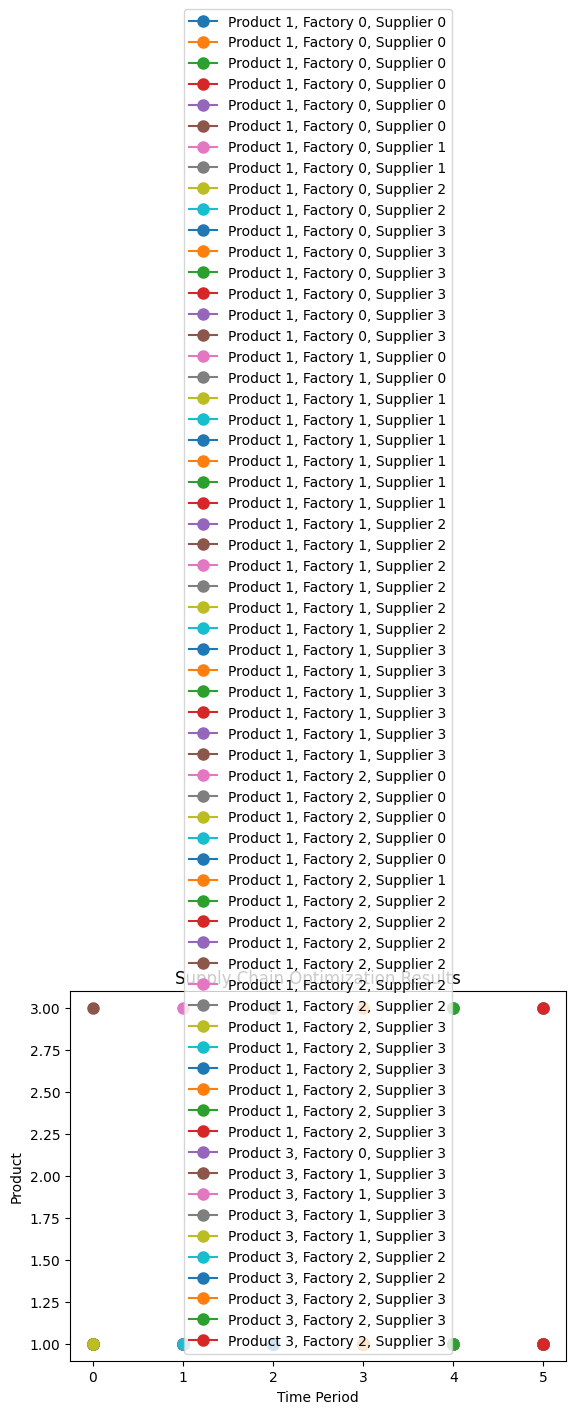

In [8]:
import matplotlib.pyplot as plt

# Extract the solution values
x_values = {(i, j, k, l): x[i, j, k, l].X for i in range(I) for j in range(J) for k in range(K) for l in range(L)}
y_values = {(i, k, l): y[i, k, l].X for i in range(I) for k in range(K) for l in range(L)}

# Plotting the results
fig, ax = plt.subplots()

# Plotting the transportation decisions (x variables)
for i in range(I):
    for j in range(J):
        for k in range(K):
            for l in range(L):
                if x_values[i, j, k, l] > 0.5:
                    ax.plot([l], [i], marker='o', markersize=8, label=f'Product {i}, Factory {j}, Supplier {k}')

# Plotting the production decisions (y variables)
for i in range(I):
    for k in range(K):
        for l in range(L):
            if y_values[i, k, l] > 0.5:
                ax.plot([l], [i], marker='s', markersize=8, label=f'Product {i}, Supplier {k}')

# Set labels and title
ax.set_xlabel('Time Period')
ax.set_ylabel('Product')
ax.set_title('Supply Chain Optimization Results')

# Add legend
ax.legend()

# Show the plot
plt.show()
